In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [50]:
beg = 0
M = 100
N = 1000
X = np.zeros((M, N))
arr1 = np.zeros((M, N))
arr3 = np.zeros((M, N))
arr4 = np.zeros((M, N))
arr5 = np.zeros((M, N))



Напишем функцию, которая посчитает оценки, квадратичную функцию и все усреднит

In [110]:
def avgSquare(teta):
    for i in range(M):
        unif_rv = sts.uniform(beg, teta - beg)
        X[i] = unif_rv.rvs(N)
        arr1[i] = np.array([np.sum(X[i, 0 : n + 1]) / (n + 1) for n in range (N)]) * 2
        arr3[i] = np.array([np.min(X[i, 0 : n + 1]) * (n + 2) for n in range(N)])
        arr4[i] = np.array([np.min(X[i, 0 : n + 1]) + np.max(X[0 : n + 1]) for n in range(N)])
        arr5[i] = np.array([np.max(X[i, 0 : n + 1]) * (n + 1) / (n + 2) for n in range(N)])
    #Считаем для каждой оценки квадратичную функцию потерь
    funct_decr_1 = (arr1 - teta) ** 2
    funct_decr_3 = (arr3 - teta) ** 2
    funct_decr_4 = (arr4 - teta) ** 2
    funct_decr_5 = (arr5 - teta) ** 2
    #Усредняем результаты для каждого N
    avg1 = np.array([np.sum(funct_decr_1[:, i]) / (M + 1) for i in range(N)])
    avg3 = np.array([np.sum(funct_decr_3[:, i]) / (M + 1) for i in range(N)])
    avg4 = np.array([np.sum(funct_decr_4[:, i]) / (M + 1) for i in range(N)])
    avg5 = np.array([np.sum(funct_decr_5[:, i]) / (M + 1) for i in range(N)])
    plt.figure(figsize=(15, 8))
    plt.ylim([0, 0.4])
    plt.plot(range(N), avg1)
    plt.plot(range(N), avg3)
    plt.plot(range(N), avg4) 
    plt.plot(range(N), avg5)
    plt.legend(['2<X>', '(n + 1)*X(1)', 'X(1) + X(n)', '(n + 1)/n * X(n)'], loc = 0, framealpha=0.5)

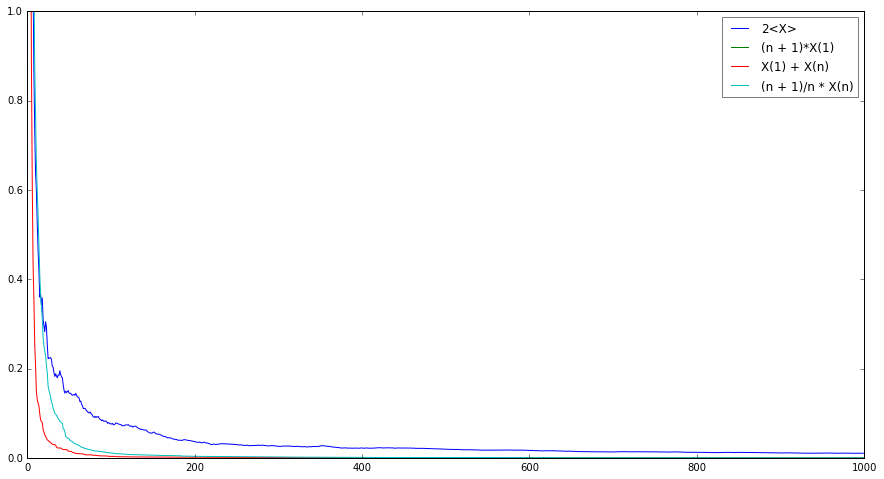

In [111]:
avgSquare(5)

Видим, что вторая оценка плоховата:(

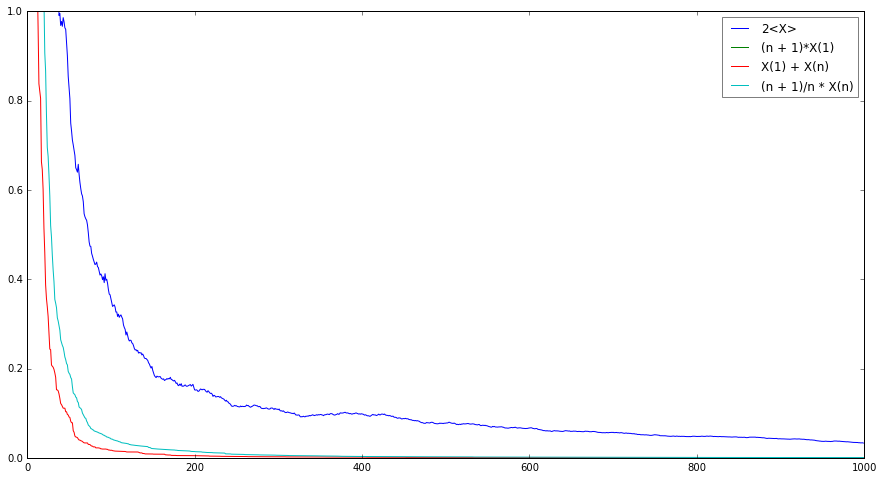

In [112]:
avgSquare(10)

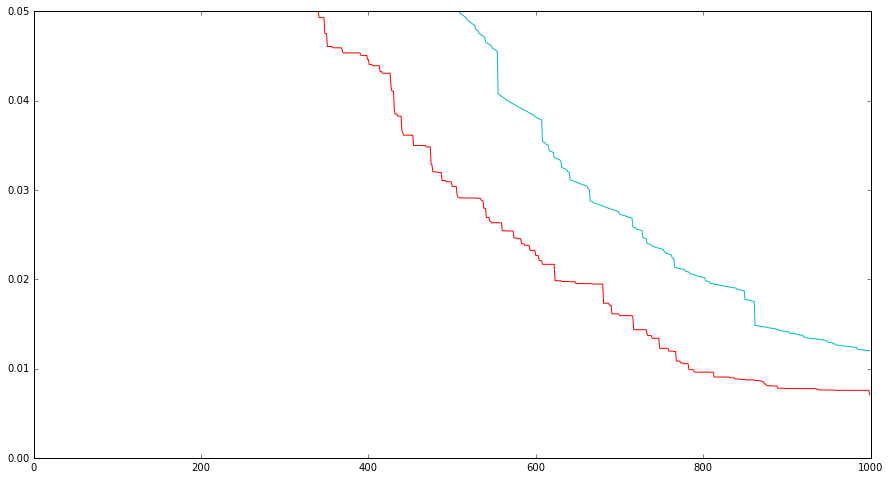

In [90]:
avgSquare(50)